In [132]:
import pandas as pd

raw_df = pd.read_feather("../data/data.feather")
test_items_df = pd.read_csv("../data/test_items.csv",index_col=0)
question_data = pd.read_csv("../data/question_data.csv", sep=';', index_col=0)

In [133]:
question_weights = pd.read_csv('../outputs/question_weights.csv', index_col=0)
q_weights = question_weights.scores.to_list()
len(q_weights)

576

In [134]:
test_item_qs = [item for item in test_items_df.index if item in raw_df.columns]

In [135]:
q_df = raw_df.drop(columns=test_item_qs)
q_df = q_df.filter(regex=r'^q\d+$')

In [136]:
# drop the lowest response q's
N_DROP = 2000
low_response = [col for col in question_data.sort_values('N').iloc[:N_DROP].index if col in q_df.columns]
q_df = q_df.drop(columns=low_response)

In [137]:
# sort by number of categories for easier manipulation later
sorted_num_levels = q_df.apply(lambda x: len(x.cat.categories)).sort_values()
q_df = q_df[sorted_num_levels.index]

In [138]:
question_data.loc[q_df.columns].to_csv('../outputs/filtered_qs.csv')

In [139]:
question_data.loc[q_df.columns]

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
q19365,If you meet someone and they are everything yo...,Yes,No,NaN,NaN,25296,O,NaN,preference
q47635,Imagine you have a partner who is able to prov...,Yes.,No.,NaN,NaN,23885,O,NaN,preference; descriptive
q165644,What's worse on a first date?,No physical attraction,Nothing to talk about,NaN,NaN,40161,O,NaN,religion/superstition; descriptive
q158,Are you an aspiring actor/artist/writer or oth...,Yes,No,NaN,NaN,40052,O,NaN,descriptive
q15744,Are you a pet person?,Yes,No,NaN,NaN,25704,O,NaN,descriptive
...,...,...,...,...,...,...,...,...,...
q30723,Which is the greatest compliment you could rec...,That you are beautiful/sexy/hot,That you are intelligent,That you are talented,That you are extremely fun to be with,25230,N,NaN,preference; descriptive
q21488,Do you pick up after yourself? Be honest.,Always.,"Yeah, when I have the time.","No, I live in filth.","No, my mom/roommate/partner mostly does it for...",30108,O,"(3, 4), 2, 1",descriptive
q274,What's the highest level of education you've c...,Graduate School,College,High School,Junior High,31706,O,NaN,descriptive
q218,Should prostitution be legal?,"Yes, absolutely","Yes, only if it were regulated",I don't think so,ABSOLUTELY NOT,25694,O,NaN,politics; religion/superstition


In [7]:
q_df

,q19365,q47635,q165644,q158,q15744,q155,q15478,q47764,q19737,q171,...,q33602,q34517,q35355,q28754,q30207,q30723,q21488,q274,q218,q265
0,NaN,NaN,Nothing to talk about,NaN,Yes,NaN,NaN,NaN,Yes,NaN,...,NaN,NaN,"I'm open, but I don't get too crazy.",At least 2 years,"No, it's fine.",NaN,NaN,Graduate School,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,Yes.,Nothing to talk about,NaN,NaN,NaN,NaN,Yes.,Yes,NaN,...,"Yes, almost always",NaN,NaN,NaN,"No, it's underrated.",NaN,NaN,College,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Get the number of unique levels per column
num_levels = q_df.nunique()

# Sort columns by unique levels
sorted_num_levels = num_levels.sort_values()

# Find the indices where the level count changes
level_counts = sorted_num_levels.values
diff = level_counts[1:] != level_counts[:-1]
border_indices = list(diff.nonzero()[0] + 1)  # +1 because diff is between elements

# For example, print the borders and corresponding levels
print("Border indices where level count changes:", border_indices)
print("Levels at borders:", level_counts[border_indices])

# You can use these indices to split the sorted columns into dfs as needed

Border indices where level count changes: [np.int64(252), np.int64(392)]
Levels at borders: [3 4]


In [9]:
import numpy as np

non_nan = ~q_df.isna()
non_nan_indices = np.flatnonzero(non_nan.values)

np.random.seed(0)
TEST_SIZE = 0.2
test_size = int(len(non_nan_indices) * TEST_SIZE)
test_mask_flat = np.random.choice(non_nan_indices, size=test_size, replace=False)

test_mask = np.zeros_like(q_df.values, dtype=bool)
test_mask.flat[test_mask_flat] = True

# mask some cells that serve as our test set
df_masked = q_df.mask(test_mask)


In [62]:
non_nan.shape

(68371, 576)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'), q_df.columns),
    ],
    sparse_threshold=1.0
)

def transform_and_drop(df):
    X = preprocessor.fit_transform(df)

    # the sklearn onehot encoder doesn't have an option to not encode nans
    feature_names = preprocessor.get_feature_names_out()
    cols_to_keep = [i for i, name in enumerate(feature_names) if not name.endswith('_nan')]
    X = X[:, cols_to_keep]
    return X

X_combined = transform_and_drop(df_masked)

In [12]:
import numpy as np
from scipy import sparse

# Original mask (shape: n_users x n_original_questions)

# convert the original mask to a mask over the onehots
def expand_mask(mask):
    mask_expanded = []
    for col_idx, col in enumerate(q_df.columns):
        n_categories = len(q_df[col].cat.categories)
        # Repeat mask along a new axis (shape: n_users x n_categories)
        mask_repeated = np.repeat(mask[:, col_idx][:, np.newaxis], n_categories, axis=1)
        mask_expanded.append(mask_repeated)
        # sanity check
        assert mask_repeated.shape[0] == 68371

    # Stack horizontally (shape: n_users x n_encoded_features)
    mask_expanded = np.hstack(mask_expanded)
    return mask_expanded

# Convert to sparse matrix (if X_combined is sparse)
test_mask_expanded = expand_mask(test_mask)
test_mask_sparse = sparse.csr_matrix(test_mask_expanded)

original_mask = expand_mask(non_nan.values)

In [13]:
# sanity check

print(test_mask_sparse.shape, X_combined.shape)
X_combined[test_mask_sparse.nonzero()].any()

(68371, 1660) (68371, 1660)


np.False_

In [106]:
# expand loss weights:

def expand_loss_weights(weights):
    weights_expanded = []
    for col_idx, col in enumerate(q_df.columns):
        n_categories = len(q_df[col].cat.categories)
        # Repeat mask along a new axis (shape: n_users x n_categories)
        weights_expanded += ([weights[col_idx]] * n_categories)
        # sanity check
    assert len(weights_expanded) == 1660
    return weights_expanded

weights_expanded = expand_loss_weights(q_weights)
_, test_mask_qs = np.nonzero(test_mask_expanded)
loss_weights_test = np.array(weights_expanded)[test_mask_qs]
loss_weights.shape

(10444820,)

### data cleaned, ready for naive bayes

In [14]:
pr_q_answered = df_masked.notna().mean()
pr_user_answered = df_masked.notna().mean(axis=1)

In [15]:
feature_names = preprocessor.get_feature_names_out()

In [16]:
feature_names = preprocessor.get_feature_names_out()
kept_features = [item[8:].split('_') for item in feature_names if not item.endswith('_nan')]

In [17]:
# demonstration of how the naive imputation model works

for user, feature in zip(*test_mask_sparse.nonzero()):
    question, option = kept_features[feature]
    print(user, question, option)
    print("pr(user answers)=", pr_user_answered[user])
    print("pr(question gets answered)=", pr_q_answered[question])
    print("pr(option i selected | question K gets answered)=", df_masked[question].value_counts(normalize=True)[option])
    print("take the prodcut of these")
    break

0 q44639 No
pr(user answers)= 0.3177083333333333
pr(question gets answered)= 0.6423483640724869
pr(option i selected | question K gets answered)= 0.38171137119176646
take the prodcut of these


In [18]:
questions = np.array([q for q, o in kept_features])
options   = np.array([o for q, o in kept_features])

option_probs = {
    q: df_masked[q].value_counts(normalize=True).reindex(q_df[q].cat.categories, fill_value=0)
    for q in q_df.columns
}
option_probs_df = pd.DataFrame(option_probs).T  # index: question, columns: option. super redundant but helps vectorize the operations below

users_idx, features_idx = test_mask_sparse.nonzero()

q_for_masked = questions[features_idx]
o_for_masked = options[features_idx]

pr_user_vals = pr_user_answered.values[users_idx]
pr_q_vals    = pr_q_answered[q_for_masked].values
pr_option_vals = option_probs_df.values[
    option_probs_df.index.get_indexer(q_for_masked),
    option_probs_df.columns.get_indexer(o_for_masked)
]

# Vectorized naive bayes
naive_imputed_values = pr_user_vals * pr_q_vals * pr_option_vals


In [19]:
# compare hidden test values to real values
X_not_masked = transform_and_drop(q_df)

# check:
X_not_masked.shape == X_combined.shape

True

In [73]:
(np.asarray(X_not_masked[test_mask_sparse] - naive_imputed_values).ravel()**2).shape

(10444820,)

In [91]:
# MSE
mse_naive = np.average(np.asarray(X_not_masked[test_mask_sparse] - naive_imputed_values).ravel()**2, weights=loss_weights)
mse_naive

np.float64(0.27249386668583225)

In [92]:
# this is the one that Yoram explained to me, but I think the one above makes more sense.

row_mean = X_combined.mean(axis=1).ravel()
col_mean = X_combined.mean(axis=0).ravel()

naive_imputation2 = np.asarray(row_mean).ravel()[users_idx] * np.asarray(col_mean).ravel()[features_idx]

mse_naive2 = np.average(np.asarray(X_not_masked[test_mask_sparse] - naive_imputation2).ravel()**2, weights=loss_weights)
mse_naive2

np.float64(0.31765224077267906)

### imputing values randomly

In [93]:
# random
mse_random = np.average(np.asarray(X_not_masked[test_mask_sparse] - np.random.uniform(size=naive_imputed_values.shape)).ravel() **2, weights=loss_weights)
mse_random

np.float64(0.33313321292160564)

In [94]:
# impute as as constant, mean of test data:

train_data = X_not_masked[original_mask & ~test_mask_sparse.toarray()]
mean_val = train_data.mean()

mse_constant = np.average(np.asarray(X_not_masked[test_mask_sparse] - (np.zeros_like(naive_imputed_values) + mean_val)).ravel() **2, weights=loss_weights)
mse_constant

np.float64(0.22617873756601115)

### imputing as modal answer

In [25]:
def get_mode(series):
    return series.mode().iloc[0]

df_modal_imputed = df_masked.apply(lambda col: col.fillna(get_mode(col)))
X_modal = transform_and_drop(df_modal_imputed)

In [95]:
# MSE
mse_modal = np.average(np.asarray(X_not_masked[test_mask_sparse] - X_modal[test_mask_sparse]).ravel() **2, weights=loss_weights)
mse_modal

np.float64(0.2552871884444088)

### low rank approximation method!

In [120]:
import torch
import torch.optim as optim
import torch.nn.functional as F

def torch_avg(tensor, weights):
    assert tensor.shape == weights.shape
    return torch.sum(tensor * weights) / torch.sum(weights)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [121]:
# Convert sparse matrices to PyTorch tensors
X_combined_tensor = torch.tensor(X_combined.toarray(), dtype=torch.float32).to(device)
test_mask_tensor = torch.tensor(test_mask_sparse.toarray(), dtype=torch.bool).to(device)
train_mask_tensor = torch.tensor(original_mask, dtype=torch.bool).to(device) & ~test_mask_tensor

train_mask_qs = torch.nonzero(train_mask_tensor)[:,1]
loss_weights_train = torch.tensor(weights_expanded)[train_mask_qs.cpu()].to(device)

In [122]:
# Hyperparameters
rank = 5  # Rank of the approximation (adjust as needed)
learning_rate = 0.2
epochs = 50

# Initialize low-rank matrices B and C
n_users, n_features = X_combined.shape
B = torch.randn(n_users, rank, requires_grad=True, device=device)
C = torch.randn(rank, n_features, requires_grad=True, device=device)
X_hat = torch.mm(B, C)

# Optimizer
optimizer = optim.Adam([B, C], lr=learning_rate)

@torch.compile
def split_and_softmax(X):
    split_sizes = [border_indices[0]] + \
                [border_indices[i+1] - border_indices[i] for i in range(len(border_indices)-1)] + \
                [q_df.shape[1] - border_indices[-1]]

    split_sizes = [item * (i+2) for i, item in enumerate(split_sizes)]
    split_tensors = torch.split(X, split_sizes, dim=1)

    processed_tensors = []
    for i, tensor in enumerate(split_tensors):
        options_per_question = 2 + i  # 2 for first split, 3 for second, 4 for third
        n_questions = tensor.shape[1] // options_per_question
        
        # Reshape to (n_users, n_questions, options_per_question)
        reshaped = tensor.view(-1, n_questions, options_per_question)
        
        # Apply softmax along the last dimension
        softmaxed = F.softmax(reshaped, dim=-1)
        processed_tensors.append(softmaxed)
    
    flattened_tensors = [tensor.view(tensor.shape[0], -1) for tensor in processed_tensors]
    X_softmaxed = torch.cat(flattened_tensors, dim=1)
    return X_softmaxed

# Training loop
# @torch.compile
def train_loop():
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        # Reconstruct X_hat = B @ C
        X_hat = torch.mm(B, C)
        X_hat = split_and_softmax(X_hat) # this is the right inductive bias and it also dratically lowers the loss

        # Compute loss only on observed entries (not masked for testing)
        loss = torch_avg((X_hat[train_mask_tensor] - X_combined_tensor[train_mask_tensor]) ** 2, weights=loss_weights_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        print(f"Epoch {epoch}, Loss: {loss.item()}")
    return X_hat

X_hat = train_loop()

Epoch 0, Loss: 0.3157169818878174
Epoch 1, Loss: 0.2808621823787689
Epoch 2, Loss: 0.25307703018188477
Epoch 3, Loss: 0.23464952409267426
Epoch 4, Loss: 0.22256280481815338
Epoch 5, Loss: 0.21221695840358734
Epoch 6, Loss: 0.20023085176944733
Epoch 7, Loss: 0.18765713274478912
Epoch 8, Loss: 0.17891374230384827
Epoch 9, Loss: 0.1747337132692337
Epoch 10, Loss: 0.17210820317268372
Epoch 11, Loss: 0.16962610185146332
Epoch 12, Loss: 0.16751839220523834
Epoch 13, Loss: 0.16572529077529907
Epoch 14, Loss: 0.16383735835552216
Epoch 15, Loss: 0.16209885478019714
Epoch 16, Loss: 0.16056764125823975
Epoch 17, Loss: 0.15906058251857758
Epoch 18, Loss: 0.1577584147453308
Epoch 19, Loss: 0.15664654970169067
Epoch 20, Loss: 0.1555720418691635
Epoch 21, Loss: 0.15451526641845703
Epoch 22, Loss: 0.15351015329360962
Epoch 23, Loss: 0.15251047909259796
Epoch 24, Loss: 0.1515348106622696
Epoch 25, Loss: 0.15062464773654938
Epoch 26, Loss: 0.14973215758800507
Epoch 27, Loss: 0.14886388182640076
Epoch 28

In [125]:
loss_weights.shape
((test_values - imputed_test_values) ** 2).shape

(1, 10444820)

In [127]:

# After training, use X_hat to impute missing values
X_imputed = X_hat.detach().cpu().numpy()

# Evaluate on test set
test_values = np.asarray(X_not_masked[test_mask_sparse])
imputed_test_values = X_imputed[test_mask_sparse.toarray()]

mse_low_rank = np.average(((test_values - imputed_test_values) ** 2).ravel(), weights=loss_weights)
print(f"Low-rank MSE: {mse_low_rank}")

Low-rank MSE: 0.1480011874856543


### autoencoder

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# # Convert data to PyTorch tensors
# X_combined_tensor = torch.tensor(X_combined.toarray(), dtype=torch.float32)
# original_mask_tensor = torch.tensor(original_mask, dtype=torch.float32)
# test_mask_tensor = torch.tensor(test_mask_sparse.toarray(), dtype=torch.float32)

# # Create a training mask: original data present but not in test set
# train_mask_tensor = original_mask_tensor * (1 - test_mask_tensor)

# Autoencoder architecture (same as before)
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
input_dim = X_combined_tensor.shape[1]
encoding_dim = 64
batch_size = 256
learning_rate = 0.001
epochs = 5

# Create the autoencoder model
model = Autoencoder(input_dim, encoding_dim).to(device)

# Loss function and optimizer
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader
dataset = TensorDataset(X_combined_tensor, train_mask_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for batch_x, batch_train_mask in dataloader:
        # Forward pass
        outputs = model(batch_x)
        
        # Compute loss only on non-masked, non-test values
        loss = criterion(outputs * batch_train_mask, batch_x * batch_train_mask)
        loss = loss / batch_train_mask.sum()  # Normalize by number of non-masked elements
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * batch_train_mask.sum()
    
    avg_loss = total_loss / train_mask_tensor.sum()
    print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}')

Epoch [1/5], Average Loss: 0.1499
Epoch [2/5], Average Loss: 0.1291
Epoch [3/5], Average Loss: 0.1226
Epoch [4/5], Average Loss: 0.1174
Epoch [5/5], Average Loss: 0.1133


In [33]:

# Use the trained model for imputation
model.eval()
with torch.no_grad():
    imputed_data = model(X_combined_tensor)

# Extract imputed values for the test set
imputed_test_values = imputed_data[test_mask_tensor.bool()].numpy()
true_test_values = np.asarray(X_not_masked[test_mask_sparse])

# Compute MSE for the autoencoder method
mse_autoencoder = ((true_test_values - imputed_test_values) ** 2).mean()
print(f"Autoencoder MSE: {mse_autoencoder}")

Autoencoder MSE: 0.13427468260616784


### autoencoder without minibatching

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# # Convert data to PyTorch tensors (if not already done)
# X_combined_tensor = torch.tensor(X_combined.toarray(), dtype=torch.float32)
# original_mask_tensor = torch.tensor(original_mask, dtype=torch.float32)
# test_mask_tensor = torch.tensor(test_mask_sparse.toarray(), dtype=torch.float32)

# # Create a training mask: original data present but not in test set
# train_mask_tensor = original_mask_tensor * (1 - test_mask_tensor)

# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Softmax function (same as in low-rank approximation)
@torch.compile
def split_and_softmax(X):
    split_sizes = [border_indices[0]] + \
                [border_indices[i+1] - border_indices[i] for i in range(len(border_indices)-1)] + \
                [q_df.shape[1] - border_indices[-1]]

    split_sizes = [item * (i+2) for i, item in enumerate(split_sizes)]
    split_tensors = torch.split(X, split_sizes, dim=1)

    processed_tensors = []
    for i, tensor in enumerate(split_tensors):
        options_per_question = 2 + i  # 2 for first split, 3 for second, 4 for third
        n_questions = tensor.shape[1] // options_per_question
        
        # Reshape to (n_users, n_questions, options_per_question)
        reshaped = tensor.view(-1, n_questions, options_per_question)
        
        # Apply softmax along the last dimension
        softmaxed = F.softmax(reshaped, dim=-1)
        processed_tensors.append(softmaxed)
    
    flattened_tensors = [tensor.view(tensor.shape[0], -1) for tensor in processed_tensors]
    X_softmaxed = torch.cat(flattened_tensors, dim=1)
    return X_softmaxed

# Hyperparameters
input_dim = X_combined_tensor.shape[1]
encoding_dim = 64
learning_rate = 0.001
epochs = 100  # Increase epochs since we're not minibatching

# Create the autoencoder model
model = Autoencoder(input_dim, encoding_dim).to(device)

# Loss function and optimizer
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_combined_tensor)
    outputs_softmax = split_and_softmax(outputs)
    
    # Compute loss only on non-masked, non-test values
    loss = criterion(outputs_softmax * train_mask_tensor, X_combined_tensor * train_mask_tensor)
    loss = loss / train_mask_tensor.sum()  # Normalize by number of non-masked elements
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Use the trained model for imputation
model.eval()
with torch.no_grad():
    imputed_data = model(X_combined_tensor)
    imputed_data_softmax = split_and_softmax(imputed_data)

# Extract imputed values for the test set
imputed_test_values = imputed_data_softmax[test_mask_tensor.bool()].cpu().numpy()
true_test_values = np.asarray(X_not_masked[test_mask_sparse])

# Compute MSE for the autoencoder method
mse_autoencoder = ((true_test_values - imputed_test_values) ** 2).mean()
print(f"Autoencoder MSE: {mse_autoencoder}")

Epoch [10/100], Loss: 0.1679
Epoch [20/100], Loss: 0.1625
Epoch [30/100], Loss: 0.1606
Epoch [40/100], Loss: 0.1595
Epoch [50/100], Loss: 0.1565
Epoch [60/100], Loss: 0.1506
Epoch [70/100], Loss: 0.1472
Epoch [80/100], Loss: 0.1448
Epoch [90/100], Loss: 0.1422
Epoch [100/100], Loss: 0.1399
Autoencoder MSE: 0.14354146827434908


### compare MSE's

/var/folders/9d/j5yw54ld78qdvpkxky67ldz40000gn/T/ipykernel_12511/1103924213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=e_series.index, y=e_series.values, palette='viridis')


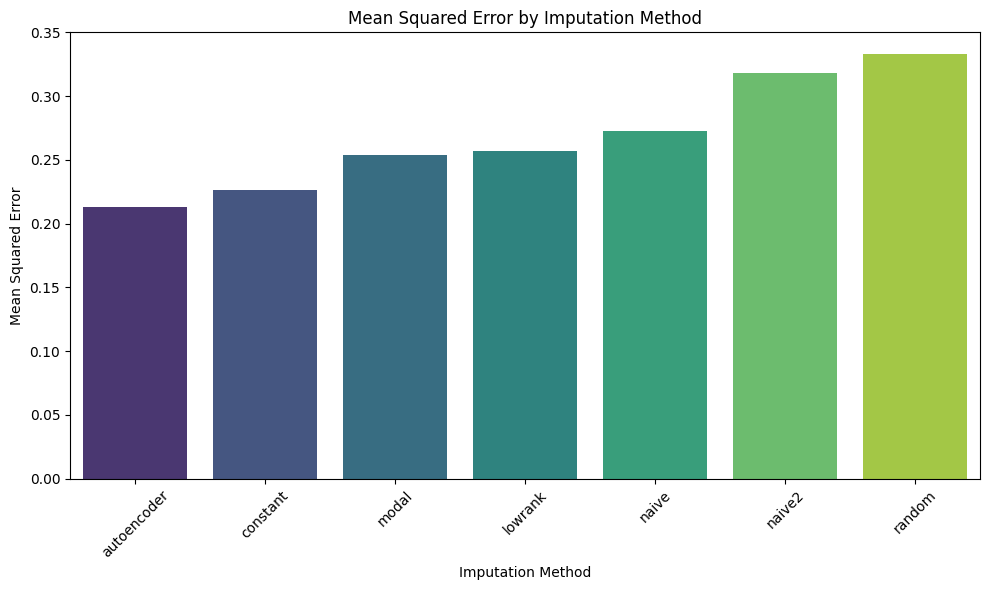

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = {"autoencoder": mse_autoencoder,
'constant': mse_constant,
'lowrank': mse_low_rank,
'modal': mse_modal,
'naive': mse_naive,
'naive2': mse_naive2,
'random': mse_random}

e_series = pd.Series(errors).sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=e_series.index, y=e_series.values, palette='viridis')
plt.title('Mean Squared Error by Imputation Method')
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../outputs/imputers.png')

plt.show()